In [1]:
from bs4 import BeautifulSoup
from bs4 import SoupStrainer
import os
import json
import numpy as np
import pandas as pd

In [2]:
path = '../input/ruthenia'
names = os.listdir(os.path.realpath(path))

In [47]:
def html_parser_v04(names, path):
    partial = SoupStrainer('div', id='main')
    finaly_list = []
    finaly_set = []
#     finaly_list_of_story = [] # для поиска больших кусков текста
    for name in names:
        npath = os.path.realpath(path) + '\\' + name        
                
        with open(npath, 'r', encoding='utf-8') as file_open:
            
            finaly_dict = {}            
            try:
                html_obj = BeautifulSoup(file_open, 'html.parser', parse_only=partial, from_encoding='utf-8')
#                 print(html_obj.prettify(), '\n')
             
                finaly_dict['file'] = name
#                 print('file:\n{0}\n'.format(name))
                
                motive = html_obj.find('p', {'class': 'NormalLin'}).get_text()
                finaly_dict['motive'] = str(motive)
#                 print('motive:\n{0}\n'.format(motive))
                
                description = html_obj.find('p', {'class': 'NormalLis'}).stripped_strings
                motive_description = ''
                for desc in description:
                    if desc:
                        motive_description = motive_description + ' ' + str(desc)
                if motive_description:
                    finaly_dict['motive_description'] = motive_description                    
                else:
                    finaly_dict['motive_description'] = None
#                 print('motive_description:\n{0}\n'.format(motive_description))
                
                contents = html_obj.find_all('p', {'class': 'NormalMai'})
                
                content_list = []
                for content in contents:
                    
                    content_dict = {}
                    
                    def build_list(cont):
#                         fin = ''
                        fin = []
                        for i in content.find_all(cont):
#                             fin = fin + '\n' + str(i.get_text())
                            fin.append(str(i.get_text()))
#                         print('{0}:\n{1}\n'.format(cont, fin))
                        if fin:
                            content_dict[cont] = fin
                        else:
                            content_dict[cont] = None       
    
                    
                    b_list = build_list('b')
                    u_list = build_list('u')
                    i_list = build_list('i')
                    
#                     str_text = ''
                    str_text = []
#                     list_text = [] # для поиска больших кусков текста
                    text = content.stripped_strings
                    for i in text:
#                         str_text = str_text + '\n' + str(i)
                        str_text.append(str(i))
                        finaly_set.append(len(i))
#                         if len(i) >= 35: # для поиска больших кусков текста
#                             list_text.append(str(i))
#                             finaly_list_of_story.append(str(i))
#                     print('str_text:\n{0}\n'.format(str_text))
                    if str_text:
                        content_dict['fulltext'] = str_text
                    else:
                        content_dict['fulltext'] = None
#                     if list_text: # для поиска больших кусков текста
#                         content_dict['storytext'] = str_text
#                     else:
#                         content_dict['storytext'] = None
                    
                    if content_dict:
                        content_list.append(content_dict)
                        
                if content_list:
                    finaly_dict['content'] = content_list
                else:
                    finaly_dict['content'] = None
                
                if finaly_dict:
                    finaly_list.append(finaly_dict)

            except AttributeError:
                print('{0} cant\'be opened as partial'.format(name))
            except UnicodeDecodeError:
                print('{0} codec problem'.format(name))
            
#             print('finaly_list:\n{0}\n'.format(finaly_list))
#             yield print('ok') #для тестов

    return finaly_list, finaly_set
    # добавить finaly_list_of_story для больших кусокв

#### тестируем сборку (можно пропустить)

In [4]:
parsed_next = html_parser_v04(names, path)

In [5]:
next(parsed_next)

<div id="main">
 <p class="NormalLin">
  A10. Солнце находит себе глаза. .52.61.
 </p>
 <p class="NormalLis">
  Солнце получает свои сверкающие глаза (глаз) от животного.
 </p>
 <p class="NormalMai">
  <b>
   Мезоамерика.
  </b>
  Солнце и луна убивают чудовищного змея или орла и забирают себе его сверкающие глаза.
  <u>
   Чатино
  </u>
  [змей]: Bartolomé 1979, № 2: 25; 1984: 12; Carrasco 1961: 46;
  <u>
   трики
  </u>
  [см. мотив A20; братья-близнецы живут в доме старухи, убивают ее мужа-Оленя; змея собирается сожрать мир, близнецы бросают ей в пасть раскаленные камни; посылают муху проверить, мертва ли змея; муха испражняется на ее левый глаз; младший брат берет себе более яркий правый глаз, старший – левый; братья идут, младший хочет пить; старший добывает воду как только младший соглашается поменяться глазами; Г. приходит к близнецам; они ее усыпляют и насилуют, нацепив камни на пенисы; убегают на небо, старший становится Солнцем, младший – Месяцем; он проглотил кролика, тот те

#### разбираем html

In [48]:
parsed, lenset = html_parser_v04(names, path)

areas1.html cant'be opened as partial
biblio.html cant'be opened as partial
c21.html cant'be opened as partial
c22.html cant'be opened as partial
c9a.html cant'be opened as partial
e31a.html cant'be opened as partial
e31a1.html cant'be opened as partial
e31b.html cant'be opened as partial
e31c.html cant'be opened as partial
eng.html cant'be opened as partial
g6a.html cant'be opened as partial
index.csv cant'be opened as partial
index.html codec problem
intro.html cant'be opened as partial
j57.html cant'be opened as partial
l85d.html cant'be opened as partial
m10.html cant'be opened as partial
m15.html cant'be opened as partial


In [49]:
with open('../output/ruthenia_parsed_v04.json', 'w') as f:
    json.dump(parsed, f)

#### Поищем большие куски текстов (можно пропустить)

In [30]:
from collections import Counter
count = Counter(lenset)

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

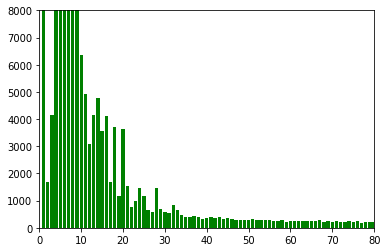

In [35]:
plt.bar(list(count.keys()), count.values(), color='g')
plt.xlim(0, 80)
plt.ylim(0, 8000)
plt.show()

In [42]:
len(din_list)

110588

In [46]:
din_list[12455]

'-хан спрашивает его, чья кровь слаще; тот отвечает, что еще не пробовал человеческой и обезьяньей; ЭН послал попробовать; обезьянья показалась горьковатой, человеческая вкусной; об этом Овод сообщает Ласточке по пути назад; та просит показать язык, откусывает его; Овод погнался за ней, прокусил ей хвост (теперь он раздвоен); у ЭН Овод только жужжал; ЭН в гневе разбил его на мелкие части – нынешних оводов]: 91-93; Тугутов, Тугутов 1992, № 21 [царь птиц Орел посылает Ласточку и Осу узнать, чье мясо вкуснее; Оса признается Ласточке, что человечье, Ласточка просит ее показать язык, вырывает; говорит Орлу, что самое вкусное мясо - змеиное; Орел питается змеями, Оса только жужжит], 22 [громовержец'

#### Весь контент одним куском

In [75]:
extracted_json = pd.read_json('../output/ruthenia_parsed_v04.json', orient='records')

In [76]:
extracted_json

,content,file,motive,motive_description
0,"[{'b': ['Мезоамерика. '], 'u': ['Чатино', 'три...",a10.html,A10. Солнце находит себе глаза. .52.61.,Солнце получает свои сверкающие глаза (глаз) ...
1,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
2,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a11b.html,A11B. Одноглазые светила.,Солнце или Месяц одноглаз (слеп). См. мотив 11A.
3,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a11c.html,"A11C. Солнце, Луна и глаза чудовища. .52.","Солнце и Луна убивают чудовище, чьи глаза све..."
4,"[{'b': ['Западная Сибирь.'], 'u': ['селькупы']...",a11d.html,A11D. Глаз Месяца и лунные фазы. (.35.52.68.),"Месяц то открывает, то закрывает глаза (фазы ..."
5,"[{'b': ['ЮЗ Африка.'], 'u': ['Бушмены'], 'i': ...",a12.html,"A12. Затмения: нападение чудовищ, A737.1.",Некое существо или существа регулярно (восход...
6,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a12a.html,A12A. Хищный зверь затмевает светила. .15.-.18...,Во время затмения или во время захода на свет...
7,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a12b.html,A12B. Лягушка проглатывает светила.,Во время затмения или на закате (отмечено*) c...
8,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a12c.html,A12C. Рептилия или рыба затмевают светила.,"Затмения солнца, луны или их заход (отмечено*..."
9,"[{'b': None, 'u': None, 'i': None, 'fulltext':...",a12d.html,A12D. Птицы затмевают светила. 11.12.18.(.22.)...,Птицы нападают на солнце или луну во время за...


In [77]:
extracted_json['content'][0]

[{'b': ['Мезоамерика. '],
  'u': ['Чатино',
   'трики',
   'сапотеки',
   'миштеки',
   'чинантеки',
   'масатеки',
   'науатль'],
  'i': ['Зачем убиваете птиц для той, кто вам не мать?'],
  'fulltext': ['Мезоамерика.',
   'Солнце и луна убивают чудовищного змея или орла и забирают себе его сверкающие глаза.',
   'Чатино',
   '[змей]: Bartolomé 1979, № 2: 25; 1984: 12; Carrasco 1961: 46;',
   'трики',
   '[см. мотив A20; братья-близнецы живут в доме старухи, убивают ее мужа-Оленя; змея собирается сожрать мир, близнецы бросают ей в пасть раскаленные камни; посылают муху проверить, мертва ли змея; муха испражняется на ее левый глаз; младший брат берет себе более яркий правый глаз, старший – левый; братья идут, младший хочет пить; старший добывает воду как только младший соглашается поменяться глазами; Г. приходит к близнецам; они ее усыпляют и насилуют, нацепив камни на пенисы; убегают на небо, старший становится Солнцем, младший – Месяцем; он проглотил кролика, тот теперь виден на нем; 

#### Нормализованный json

In [79]:
normalised = pd.io.json.json_normalize(parsed, 'content', ['file', 'motive', 'motive_description'], errors="ignore")

In [80]:
normalised

,b,fulltext,i,u,file,motive,motive_description
0,[Мезоамерика. ],"[Мезоамерика., Солнце и луна убивают чудовищно...","[Зачем убиваете птиц для той, кто вам не мать?]","[Чатино, трики, сапотеки, миштеки, чинантеки, ...",a10.html,A10. Солнце находит себе глаза. .52.61.,Солнце получает свои сверкающие глаза (глаз) ...
1,[Ср. Гондурас – Панама.],"[(, Ср. Гондурас – Панама., Брибри, [собираясь...",None,[Брибри],a10.html,A10. Солнце находит себе глаза. .52.61.,Солнце получает свои сверкающие глаза (глаз) ...
2,[Западная Амазония.],"[Западная Амазония., Солнце выменивает у лиса ...",None,"[Ачуар, агуаруна]",a10.html,A10. Солнце находит себе глаза. .52.61.,Солнце получает свои сверкающие глаза (глаз) ...
3,None,"[Масаи, куни, мыс Кайзера Вильгельма, букавак,...",None,None,a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
4,[Судан – Восточная Африка.],"[Судан – Восточная Африка., Масаи, [Солнце взя...",None,[Масаи],a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
5,[Меланезия.],"[Меланезия., Куни, [Солнце и Месяц равно горяч...",None,"[Куни, мыс Кинг Уильям, букавак, вагавага]",a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
6,[Тибет – Северо-Восток Индии.],"[Тибет – Северо-Восток Индии., Апатани, [Солнц...",None,"[Апатани, дафла, галлонг]",a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
7,[Южная Азия.],"[Южная Азия., Байга, [Солнце мужчина, Луна – ж...",None,"[Байга, бхуйя, сора]",a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
8,[Тайвань – Филиппины.],"[Тайвань – Филиппины., Ифугао, [1) Солнце и Ме...",None,"[Ифугао, набалои, бикол, пампанго, пайван, бунун]",a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...
9,[Китай – Корея.],"[Китай – Корея., Корейцы, [Солнце – брат, Луна...",None,[Корейцы],a11a.html,A11A. Глаза светил: прохлада и ночь. .13.19.21...,Видимое солнце или луна есть их глаза; если б...


In [92]:
normalised['file'].iloc[511]

'a23c.html'

In [93]:
normalised['motive'].iloc[511]

'A23C. Кто взлетит выше? ATU 221A '

In [94]:
normalised['motive_description'].iloc[511]

' Птицы спорят, кто из них взлетит выше или прилетит первым. Побеждает тот, чья победа казалась маловероятной (он прячется в перьях сильной птицы и взлетает вместе с ней).'

In [88]:
normalised['b'].iloc[511]

['Средняя Европа.']

In [89]:
normalised['u'].iloc[511]

['Лужичане', 'поляки', 'украинцы']

In [90]:
normalised['i'].iloc[511]

['Выборы царя птиц']

In [91]:
normalised['fulltext'].iloc[511]

['Средняя Европа.',
 'Лужичане',
 '[птицы выбирают короля, большие предлагают Аиста, маленькие – Крапивника; решают выбрать того, кто выше поднимется в небо (Крапивник садится Аисту на хвост); кто глубже зароется в землю; Аист увяз в болоте, Крапивник скрылся в мышиной норе; большие птицы велят Сове сторожить нору, ибо у нее большие глаза; Сова закрывает сперва один глаз, затем оба; Крапивник улетел, стал королем птиц; большие птицы с тех пор преследуют Сову]: Veckenstedt 1880, № 45.4: 424 (=Dähnhardt 1912: 170-171, перевод в Романенко 1962: 136-137);',
 'поляки',
 '[по предложению Сороки, царем решают избрать того, кто выше взлетит; Орел трижды поднимается, но каждый раз спрятавшийся под крылом Королек, говорит, что он выше; на третий раз обман открывается, королька гонят и он прячется под изгородью; вар.: Королек все кричал, что он король; птицы погнали его, он спрятался в мышиной норе; птицы объяснили Орлу, что Королек стал королем не птиц, а мышей]: Dähnhardt 1912: 171;',
 'украинц